# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +63.10669348189                   -2.50    3.69s
  2   +57.30428983282        0.76       -1.38   60.4ms
  3   +41.58014050566        1.20       -1.01   13.9ms
  4   +31.79894457173        0.99       -0.86   36.4ms
  5   +28.86569078682        0.47       -0.76   11.6ms
  6   +13.66938841604        1.18       -0.70   14.7ms
  7   +8.982454042108        0.67       -0.72   9.75ms
  8   +8.027055813786       -0.02       -0.69   13.0ms
  9   +7.425673990042       -0.22       -0.71   13.1ms
 10   +6.384870862087        0.02       -0.75   12.8ms
 11   +5.863438625691       -0.28       -0.75   10.1ms
 12   +5.663975229368       -0.70       -0.74   11.0ms
 13   +5.452492139199       -0.67       -0.69   9.05ms
 14   +5.279571700464       -0.76       -0.68   11.0ms
 15   +5.138089655303       -0.85       -0.70   10.8ms
 16   +5.031525867605       -0.97       -0.70   8.30ms
 17   +4.93

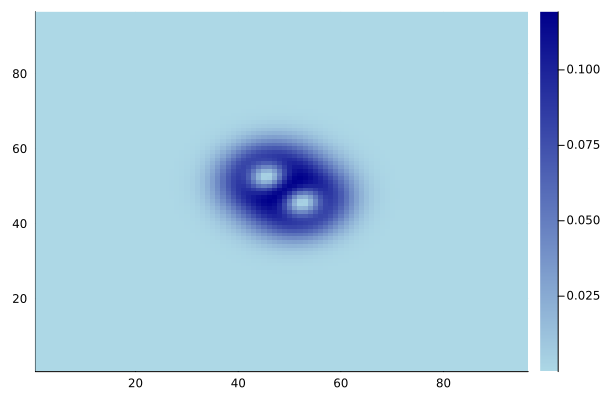

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)